<a href="https://colab.research.google.com/github/adikal25/Statistical-Analysis/blob/main/StatisticalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [3]:

import pandas as pd

# Assuming X and y are defined as in the previous code
df = pd.DataFrame(X)
df['target'] = y

# Now df contains the features and target variable
print(df.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  \
0     NaN            5   may       261         1     -1         0      NaN   
1     NaN            5   may       151         1     -1         0      NaN   
2     NaN            5   may        76         1     -1         0      NaN   
3     NaN            5   may        92         1     -1         0      NaN   
4     NaN            5   may       198         1     -1         0      NaN   

  target  
0     no  
1     no  
2     no  
3     no  
4     no  


In [4]:

import pandas as pd

df = pd.DataFrame(X)
df['target'] = y

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


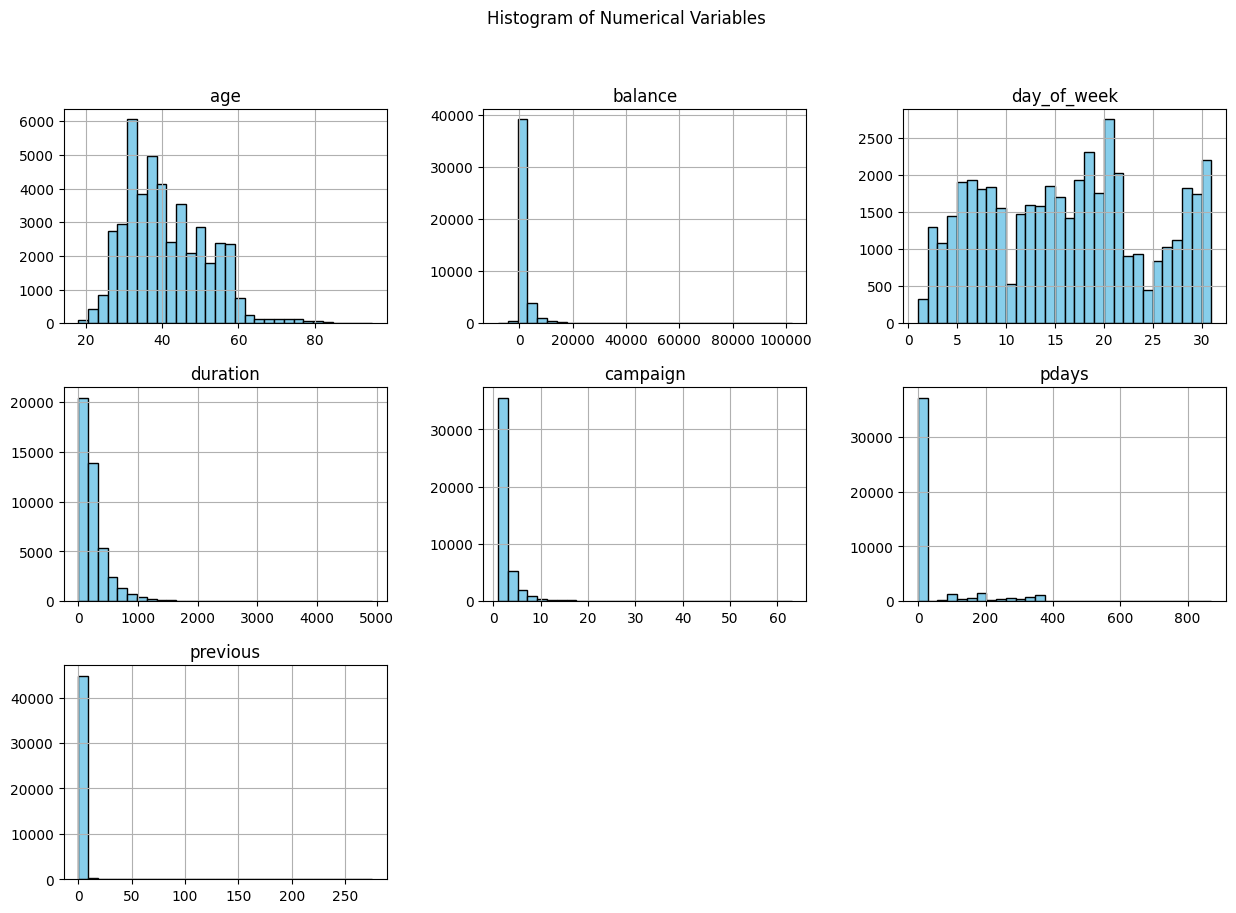

In [7]:
# Plot histograms for all numerical variables
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include='number').columns

df[numerical_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogram of Numerical Variables')
plt.show()

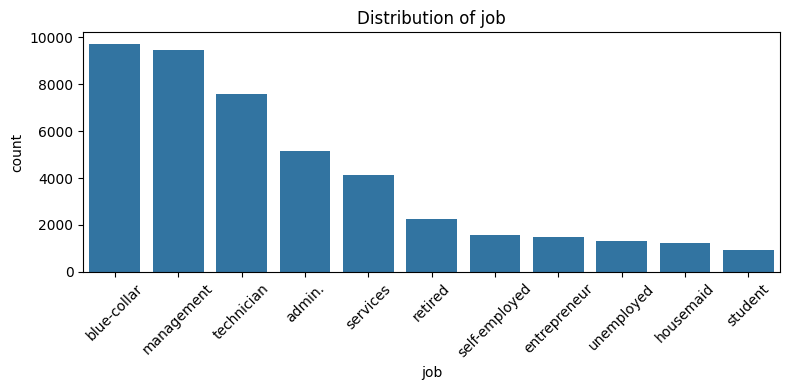

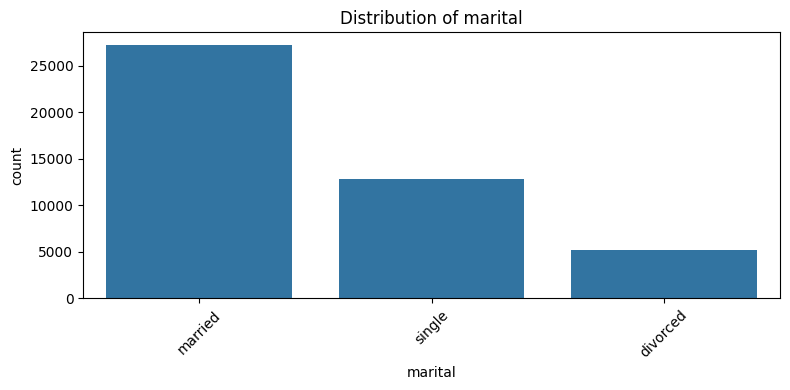

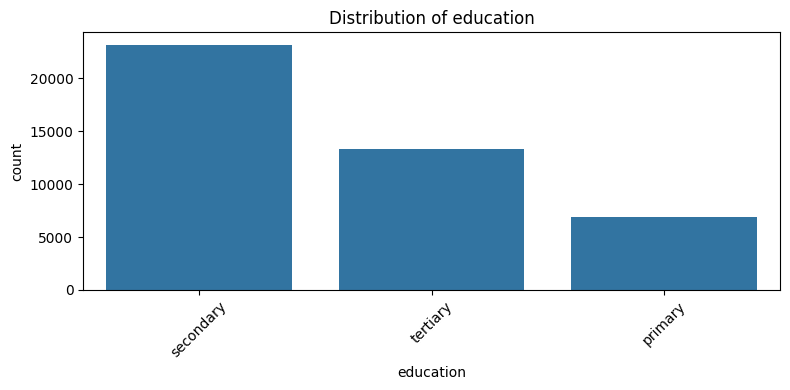

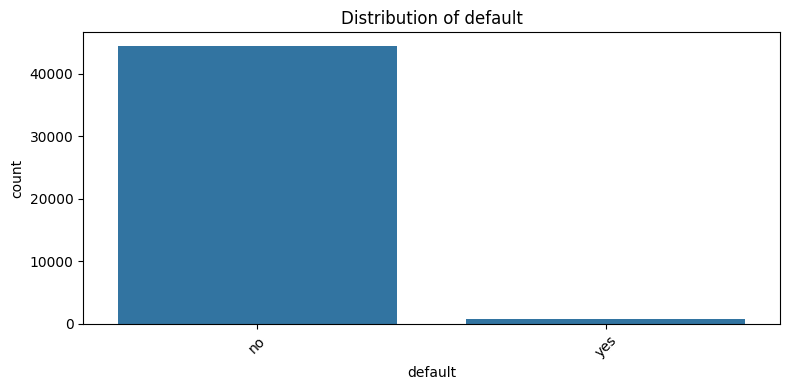

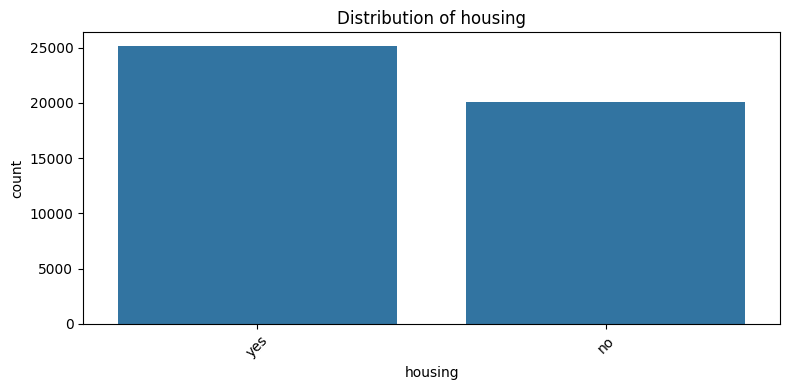

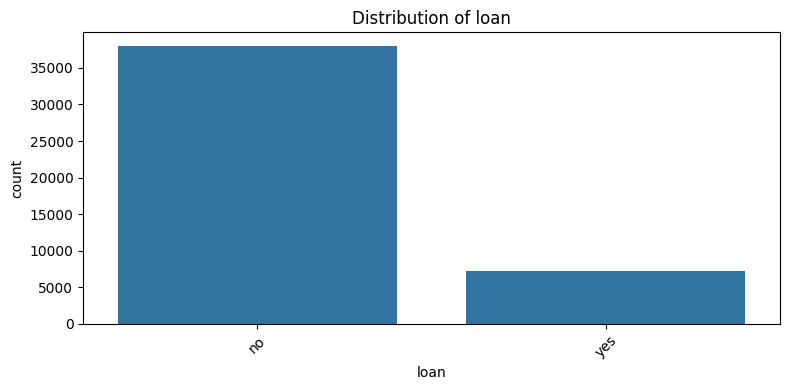

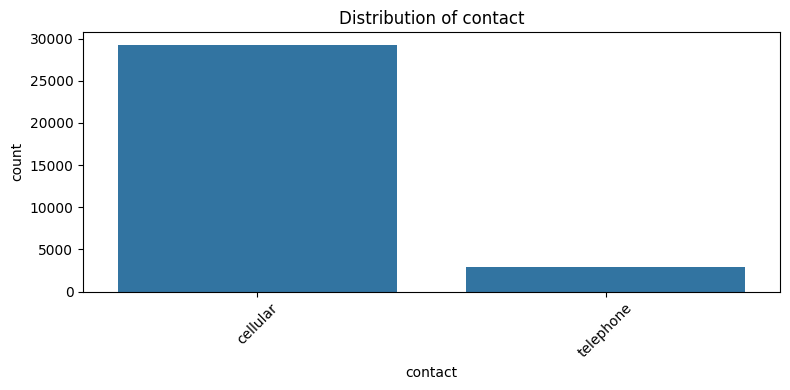

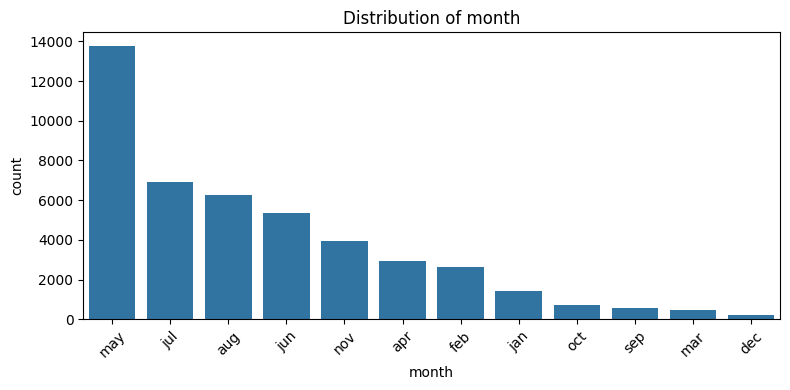

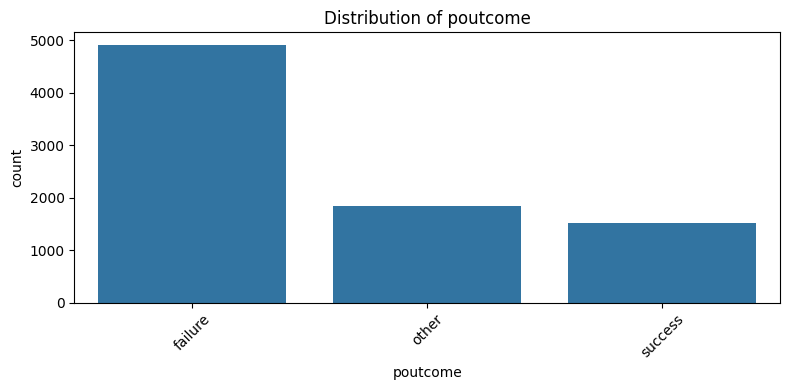

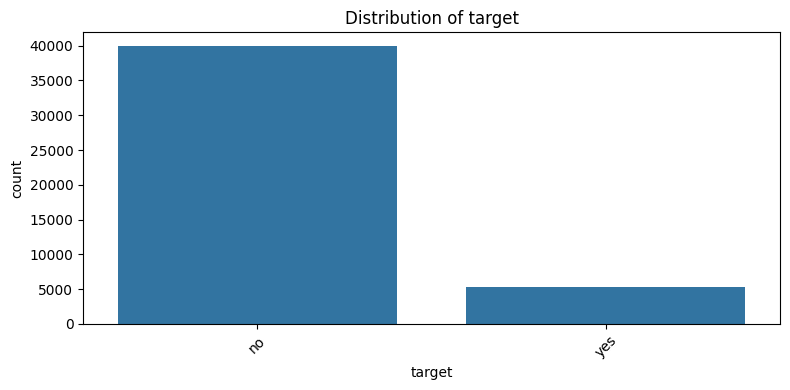

In [9]:

import seaborn as sns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


##Chi square test between categorical variables and the result df[y]
HO:Assuming that the they are independent of each other




In [12]:
from scipy.stats import chi2_contingency
for col in categorical_cols:
  contingency_table = pd.crosstab(df[col], df['target'])
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  print(f"Chi-square test for {col}:")
  print(f"Chi-square statistic: {chi2}")
  print(f"P-value: {p}")
  print(f"Degrees of freedom: {dof}")
  print()

Chi-square test for job:
Chi-square statistic: 836.1448351240688
P-value: 3.486711140869683e-173
Degrees of freedom: 10

Chi-square test for marital:
Chi-square statistic: 196.49594565603957
P-value: 2.1450999986791792e-43
Degrees of freedom: 2

Chi-square test for education:
Chi-square statistic: 233.74651791939363
P-value: 1.7481896783696894e-51
Degrees of freedom: 2

Chi-square test for default:
Chi-square statistic: 22.20224995571685
P-value: 2.4538606753508344e-06
Degrees of freedom: 1

Chi-square test for housing:
Chi-square statistic: 874.822448867983
P-value: 2.918797605076633e-192
Degrees of freedom: 1

Chi-square test for loan:
Chi-square statistic: 209.61698034978633
P-value: 1.665061163492756e-47
Degrees of freedom: 1

Chi-square test for contact:
Chi-square statistic: 4.593240338277887
P-value: 0.03209827633501861
Degrees of freedom: 1

Chi-square test for month:
Chi-square statistic: 3061.838938445269
P-value: 0.0
Degrees of freedom: 11

Chi-square test for poutcome:
Chi-

We can conclude that the job and housing are major factors in the outcome of the loan